In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt

from absl import logging
from six import BytesIO
from PIL import Image, ImageOps
from scipy.spatial import cKDTree
from skimage.measure import ransac
from skimage.feature import plot_matches
from six.moves.urllib.request import urlopen
from skimage.transform import AffineTransform

In [2]:
images = "Bridge of Sighs" 
if images == "Bridge of Sighs":
  # from: https://commons.wikimedia.org/wiki/File:Bridge_of_Sighs,_Oxford.jpg
  # by: N.H. Fischer
  IMAGE_1_URL = 'https://upload.wikimedia.org/wikipedia/commons/2/28/Bridge_of_Sighs%2C_Oxford.jpg'
  # from https://commons.wikimedia.org/wiki/File:The_Bridge_of_Sighs_and_Sheldonian_Theatre,_Oxford.jpg
  # by: Matthew Hoser
  IMAGE_2_URL = 'https://upload.wikimedia.org/wikipedia/commons/c/c3/The_Bridge_of_Sighs_and_Sheldonian_Theatre%2C_Oxford.jpg'
elif images == "Golden Gate":
  IMAGE_1_URL = 'https://upload.wikimedia.org/wikipedia/commons/1/1e/Golden_gate2.jpg'
  IMAGE_2_URL = 'https://upload.wikimedia.org/wikipedia/commons/3/3e/GoldenGateBridge.jpg'
elif images == "Acropolis":
  IMAGE_1_URL = 'https://upload.wikimedia.org/wikipedia/commons/c/ce/2006_01_21_Ath%C3%A8nes_Parth%C3%A9non.JPG'
  IMAGE_2_URL = 'https://upload.wikimedia.org/wikipedia/commons/5/5c/ACROPOLIS_1969_-_panoramio_-_jean_melis.jpg'
else:
  IMAGE_1_URL = 'https://upload.wikimedia.org/wikipedia/commons/d/d8/Eiffel_Tower%2C_November_15%2C_2011.jpg'
  IMAGE_2_URL = 'https://upload.wikimedia.org/wikipedia/commons/a/a8/Eiffel_Tower_from_immediately_beside_it%2C_Paris_May_2008.jpg'

In [3]:
def download_and_resize(name, url, new_width = 256, new_height = 256):
  path = tf.keras.utils.get_file(url.split('/')[-1], url)
  image = Image.open(path)
  image = ImageOps.fit(image, (new_width, new_height), Image.ANTIALIAS)
  return image

14172160/14164194 [==============================] - 3s 0us/step


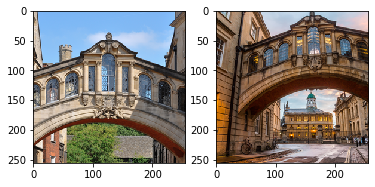

In [4]:
image1 = download_and_resize('image_1.jpg', IMAGE_1_URL)
image2 = download_and_resize('image_2.jpg', IMAGE_2_URL)

plt.subplot(1,2,1)
plt.imshow(image1)
plt.subplot(1,2,2)
plt.imshow(image2)